# MODELOS

## Librerias

In [1]:
### Cargar paquetes
import pandas as pd ### para manejo de datos
import sqlite3 as sql
import Funciones as funciones  ###archivo de funciones profe
from sklearn import linear_model ## para regresión lineal
from sklearn import tree ###para ajustar arboles de decisión
from sklearn.ensemble import RandomForestRegressor ##Ensamble con bagging
from sklearn.ensemble import GradientBoostingRegressor ###Ensamble boosting
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt ### gráficos
from sklearn.model_selection import RandomizedSearchCV
import joblib  ### para guardar modelos
from sklearn.preprocessing import StandardScaler ## escalar variables 

## Datos

In [2]:
#Traer base de datos
df_final=("DATA/df_final.csv")  
df_final=pd.read_csv(df_final)
### Selección de variables ###
df = df_final.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

## Imputación de variables

In [3]:
df1=df.drop(columns=["retirementDate"])

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeID               4410 non-null   int64  
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [6]:
#### imputación para variables categóricas y numéricas
##se separan columnas categóricas o que se quieran tratar así de las numéricas

list_cat=['BusinessTravel', 'Department', 'Gender', 
          'JobRole', 'MaritalStatus', 'EducationField', 'resignationReason']

df1=funciones.imputar_f(df1,list_cat)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BusinessTravel     4410 non-null   object
 1   Department         4410 non-null   object
 2   Gender             4410 non-null   object
 3   JobRole            4410 non-null   object
 4   MaritalStatus      4410 non-null   object
 5   EducationField     4410 non-null   object
 6   resignationReason  4410 non-null   object
dtypes: object(7)
memory usage: 241.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   Education                4410 non-null   float64
 3   EmployeeID               4410 non-null   float6

## Conversión a dummies

In [7]:
# convertir las variables categoricas en dummies
list_dummies=['BusinessTravel', 'Department', 'Gender', 
          'JobRole', 'MaritalStatus', 'EducationField', 'resignationReason']


df_dummies=pd.get_dummies(df1,columns=list_dummies)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   EmployeeID                         4410 non-null   float64
 4   JobLevel                           4410 non-null   float64
 5   MonthlyIncome                      4410 non-null   float64
 6   NumCompaniesWorked                 4410 non-null   float64
 7   PercentSalaryHike                  4410 non-null   float64
 8   StockOptionLevel                   4410 non-null   float64
 9   TotalWorkingYears                  4410 non-null   float64
 10  TrainingTimesLastYear              4410 non-null   float64
 11  YearsAtCompany                     4410 non-null   float

## Selección de variables

In [8]:
y=df_dummies.Attrition
X1= df_dummies.loc[:,~df_dummies.columns.isin(['Attrition','EmployeeID'])]

scaler=StandardScaler()
scaler.fit(X1)
X2=scaler.transform(X1)
X=pd.DataFrame(X2,columns=X1.columns)

m_lreg = linear_model.LinearRegression()
m_rtree=tree.DecisionTreeRegressor()
m_rf= RandomForestRegressor()
m_gbt=GradientBoostingRegressor()

modelos=list([m_lreg,m_rtree, m_rf, m_gbt])

var_names=funciones.sel_variables(modelos,X,y,threshold="2.5*mean") #No funciona con Vector machine
var_names.shape

(6,)

## Matriz con variables seleccionadas

In [9]:
X2=X[var_names] 
X2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BusinessTravel_Travel_Frequently  4410 non-null   float64
 1   BusinessTravel_Travel_Rarely      4410 non-null   float64
 2   JobRole_Laboratory Technician     4410 non-null   float64
 3   JobRole_Research Scientist        4410 non-null   float64
 4   JobRole_Sales Executive           4410 non-null   float64
 5   resignationReason_NoRetirement    4410 non-null   float64
dtypes: float64(6)
memory usage: 206.8 KB


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   float64
 1   DistanceFromHome                   4410 non-null   float64
 2   Education                          4410 non-null   float64
 3   JobLevel                           4410 non-null   float64
 4   MonthlyIncome                      4410 non-null   float64
 5   NumCompaniesWorked                 4410 non-null   float64
 6   PercentSalaryHike                  4410 non-null   float64
 7   StockOptionLevel                   4410 non-null   float64
 8   TotalWorkingYears                  4410 non-null   float64
 9   TrainingTimesLastYear              4410 non-null   float64
 10  YearsAtCompany                     4410 non-null   float64
 11  YearsSinceLastPromotion            4410 non-null   float

## Modelo K fold cross validation
#### con base full y con variables seleccionadas

In [11]:
rmse_df=funciones.medir_modelos(modelos,"neg_root_mean_squared_error",X,y,4) ## base con todas las variables #4: Número de grupos en que va a separar los datos para realizar el cross validation
rmse_varsel=funciones.medir_modelos(modelos,"neg_root_mean_squared_error",X2,y,4) ### base con variables seleccionadas

In [12]:
rmse=pd.concat([rmse_df,rmse_varsel],axis=1)
rmse.columns=['rl', 'dt', 'rf', 'gb',
       'rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']
rmse

,rl,dt,rf,gb,rl_Sel,dt_sel,rf_sel,gb_Sel
0,-0.129148,-0.108564,-0.110042,-0.122482,-0.130455,-0.130380,-0.130379,-0.130339
1,-0.111574,-0.095217,-0.090833,-0.103950,-0.111645,-0.111431,-0.111422,-0.111418
2,-0.138291,-0.120495,-0.123529,-0.132369,-0.139730,-0.139660,-0.139716,-0.139652
3,-0.116877,-0.108613,-0.105219,-0.113650,-0.116288,-0.116452,-0.116472,-0.116422


**Interpretación tabla** 

<Axes: >

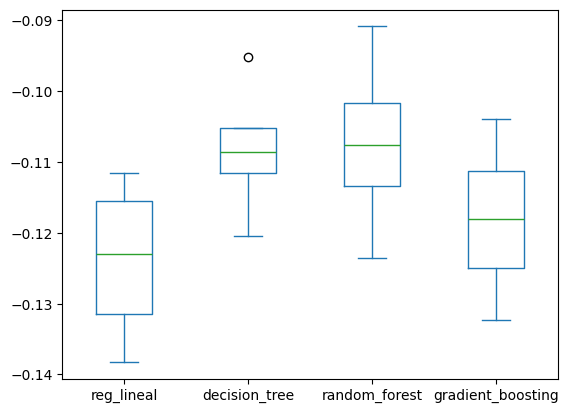

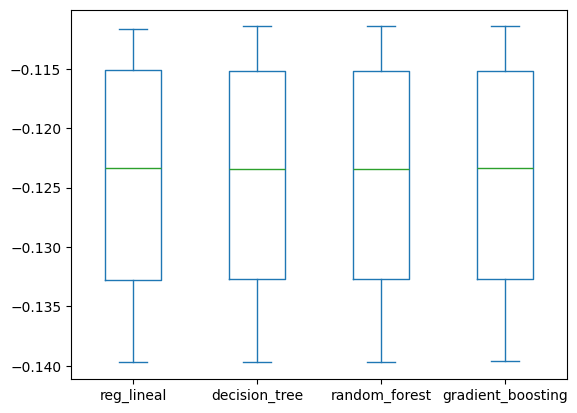

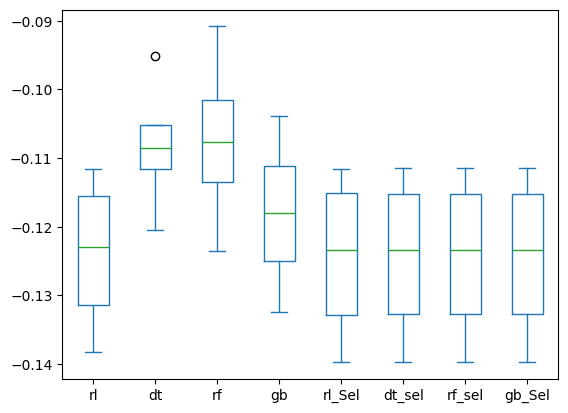

In [13]:
rmse_df.plot(kind='box') #### gráfico para modelos todas las varibles
rmse_varsel.plot(kind='box') ### gráfico para modelo variables seleccionadas
rmse.plot(kind='box') ### gráfico para modelos sel y todas las variables

<Axes: >

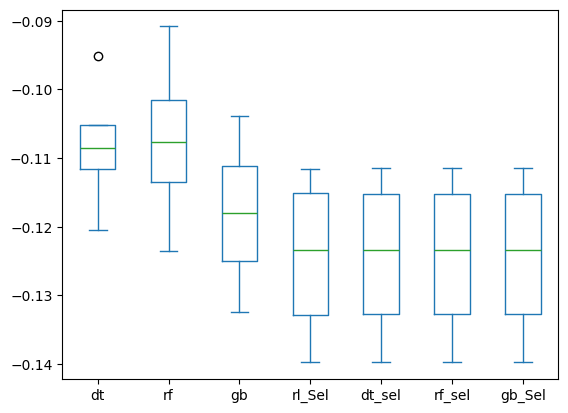

In [14]:

rmse2=rmse[ ['dt', 'rf', 'gb','rl_Sel', 'dt_sel', 'rf_sel', 'gb_Sel']]
rmse2.plot(kind='box') ### gráfico para modelos sel y todas las variables


## Tuneo de hiperparametros

In [53]:
# Hiperparametros de Arboles de decisión
param_grid = [{'max_depth': [3, 5, 7, 9, 11, None], 
               'min_samples_split': [2, 5, 10, 20], 
               'min_samples_leaf': [1, 5, 10, 20]}]

tun_rtree = RandomizedSearchCV(m_rtree, param_distributions=param_grid, n_iter=10, scoring="neg_root_mean_squared_error")
tun_rtree.fit(X2, y)

pd.set_option('display.max_colwidth', 100)
resultados = tun_rtree.cv_results_
print(tun_rtree.best_params_)
pd_resultados = pd.DataFrame(resultados)
display(pd_resultados[["params", "mean_test_score"]])
rtree_final = tun_rtree.best_estimator_ ### Guardar el modelo con hyperparameter tunning

{'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 5}


,params,mean_test_score
0,"{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 7}",-0.123655
1,"{'min_samples_split': 10, 'min_samples_leaf': 20, 'max_depth': 5}",-0.123652
2,"{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 5}",-0.123652
3,"{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 5}",-0.123652
4,"{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 9}",-0.123655
5,"{'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 11}",-0.123655
6,"{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 9}",-0.123655
7,"{'min_samples_split': 2, 'min_samples_leaf': 20, 'max_depth': 9}",-0.123655
8,"{'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': None}",-0.123655
9,"{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}",-0.123652


In [55]:
# Hiperparametros de Random Forest
param_grid = [{'n_estimators': [3, 500, 100], 'max_features': [5,20],
               'min_samples_split': [100, 20, 5]}]

tun_rf=RandomizedSearchCV(m_rf,param_distributions=param_grid,n_iter=10,scoring="neg_root_mean_squared_error")
tun_rf.fit(X2,y)
### se comenta porque toma mucho tiempo en ejecutar

pd.set_option('display.max_colwidth', 100)
resultados=tun_rf.cv_results_
tun_rf.best_params_
pd_resultados=pd.DataFrame(resultados)
pd_resultados[["params","mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

rf_final=tun_rf.best_estimator_ ### Guardar el modelo con hyperparameter tunning
m_lreg=m_lreg.fit(X2,y)

## Exportación del proyecto

In [56]:
joblib.dump(rf_final, "salidas\\rf_final.pkl") ## 
joblib.dump(m_lreg, "salidas\\m_lreg.pkl") ## 
joblib.dump(rtree_final, "salidas\\rtree_final.pkl") ## 
joblib.dump(list_cat, "salidas\\list_cat.pkl") ### para realizar imputacion
joblib.dump(list_dummies, "salidas\\list_dummies.pkl")  ### para convertir a dummies
joblib.dump(var_names, "salidas\\var_names.pkl")  ### para variables con que se entrena modelo
joblib.dump(scaler, "salidas\\scaler.pkl") ## 


### funcion para cargar objeto guardado ###
rf_final = joblib.load("salidas\\rf_final.pkl")
m_lreg = joblib.load("salidas\\m_lreg.pkl")
rtree_final = joblib.load("salidas\\rtree_final.pkl")
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

list_cat=joblib.load("salidas\\list_cat.pkl")
list_dummies=joblib.load("salidas\\list_dummies.pkl")
var_names=joblib.load("salidas\\var_names.pkl")
scaler=joblib.load("salidas\\scaler.pkl") 

print(hasattr(rf_final, 'fit'))  # Si es True, rf_final tiene un método fit
print(hasattr(rtree_final, 'fit'))  # Si es True, rtree_final tiene un método fit
print(hasattr(m_lreg, 'fit'))  # Si es True, m_lreg tiene un método fit


True
True
True


## Evaluación
#### Métrica de entrenamiento y  para mirar sobre ajuste

In [57]:
eval=cross_validate(rf_final,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)
eval2=cross_validate(m_lreg,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)
eval3=cross_validate(rtree_final,X2,y,cv=5,scoring="neg_root_mean_squared_error",return_train_score=True)


## Resultados para RL, RF y DTREE

In [58]:
#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RF
train_rf=pd.DataFrame(eval['train_score'])
test_rf=pd.DataFrame(eval['test_score'])
train_test_rf=pd.concat([train_rf, test_rf],axis=1)
train_test_rf.columns=['train_score','test_score']

#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RL
train_rl=pd.DataFrame(eval2['train_score'])
test_rl=pd.DataFrame(eval2['test_score'])
train_test_rl=pd.concat([train_rl, test_rl],axis=1)
train_test_rl.columns=['train_score','test_score']

#### convertir resultado de evaluacion entrenamiento y evaluacion en data frame para RTree
train_rtree=pd.DataFrame(eval3['train_score'])
test_rtree=pd.DataFrame(eval3['test_score'])
train_test_rtree=pd.concat([train_rtree, test_rtree],axis=1)
train_test_rtree.columns=['train_score','test_score']

In [59]:
train_test_rf

,train_score,test_score
0,-0.120978,-0.137959
1,-0.130885,-0.094537
2,-0.119974,-0.141020
3,-0.122215,-0.133061
4,-0.127475,-0.111653


In [60]:
train_test_rl

,train_score,test_score
0,-0.121188,-0.137989
1,-0.131090,-0.094710
2,-0.120175,-0.141179
3,-0.122443,-0.133175
4,-0.127769,-0.111401


In [61]:
train_test_rtree

,train_score,test_score
0,-0.121034,-0.138031
1,-0.130926,-0.094445
2,-0.120018,-0.141047
3,-0.122257,-0.133028
4,-0.127493,-0.111708


In [49]:
train_test_rl["test_score"].mean()

-0.1236907786030351

In [50]:
train_test_rf["test_score"].mean()

-0.12366127122557793

In [62]:
train_test_rtree["test_score"].mean()

-0.12365167952736396

In [63]:
rmse_rl = -(-0.1236907786030351) 
rmse_rf = -(-0.12366127122557793)
rmse_rtree = -(-0.12365167952736396)

print(f"Linear Regression RMSE: {rmse_rl}")
print(f"Random Forest RMSE: {rmse_rf}")
print(f"Regression Tree RMSE: {rmse_rtree}")

Linear Regression RMSE: 0.1236907786030351
Random Forest RMSE: 0.12366127122557793
Regression Tree RMSE: 0.12365167952736396


## Comparación con predicciones actuales

In [72]:
mse=mean_squared_error(df1['Attrition'], df1['Attrition'])
rmse= mse**(0.5)
rmse

0.0

In [79]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   DistanceFromHome         4410 non-null   float64
 2   Education                4410 non-null   float64
 3   EmployeeID               4410 non-null   float64
 4   JobLevel                 4410 non-null   float64
 5   MonthlyIncome            4410 non-null   float64
 6   NumCompaniesWorked       4410 non-null   float64
 7   PercentSalaryHike        4410 non-null   float64
 8   StockOptionLevel         4410 non-null   float64
 9   TotalWorkingYears        4410 non-null   float64
 10  TrainingTimesLastYear    4410 non-null   float64
 11  YearsAtCompany           4410 non-null   float64
 12  YearsSinceLastPromotion  4410 non-null   float64
 13  YearsWithCurrManager     4410 non-null   float64
 14  EnvironmentSatisfaction 

## Distribución de los errores

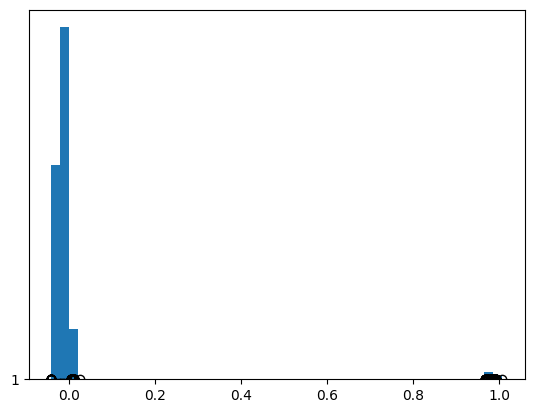

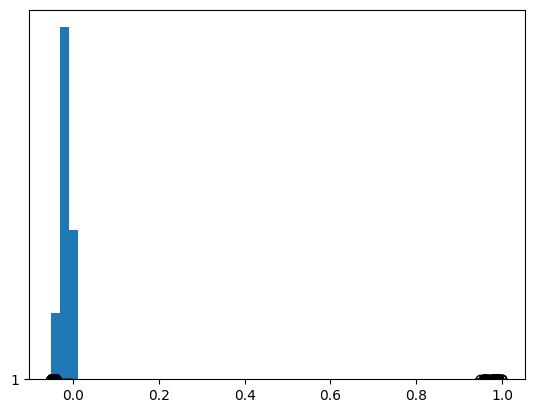

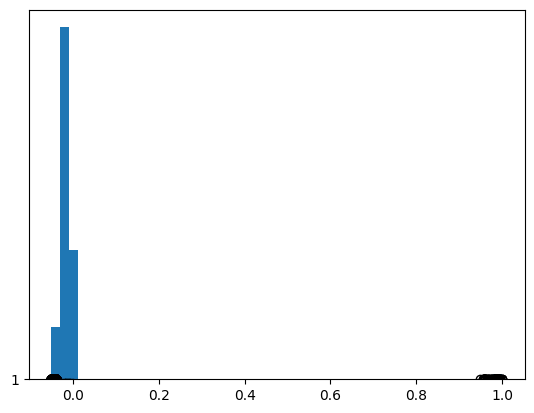

In [64]:
predictions=cross_val_predict(m_lreg,X2,y,cv=5)

pred=pd.DataFrame(predictions,columns=['pred'])
pdy=y.to_frame()
error=pdy['Attrition']-pred['pred']

error.hist(bins=50, grid=False)

plt.boxplot(error,vert=False)
plt.show()

predictions2=cross_val_predict(rf_final,X2,y,cv=5)

pred2=pd.DataFrame(predictions2,columns=['pred'])
error2=pdy['Attrition']-pred2['pred']
error2.hist(bins=50, grid=False)

plt.boxplot(error2,vert=False)
plt.show()

predictions3=cross_val_predict(rtree_final,X2,y,cv=5)

pred3=pd.DataFrame(predictions3,columns=['pred'])
error3=pdy['Attrition']-pred3['pred']
error3.hist(bins=50, grid=False)

plt.boxplot(error3,vert=False)
plt.show()

## Importancia de variables

In [65]:
pd.set_option('display.max_rows', 100)

In [68]:
pd.set_option('display.max_rows', 100)
importancia1=pd.DataFrame(rf_final.feature_names_in_)
importancia2=pd.DataFrame(rf_final.feature_importances_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')
importancia.sort_values(by=["peso"], ascending=False)

,variable,peso
5,resignationReason_NoRetirement,0.995946
0,BusinessTravel_Travel_Frequently,0.002983
4,JobRole_Sales Executive,0.000366
1,BusinessTravel_Travel_Rarely,0.000279
3,JobRole_Research Scientist,0.000255
2,JobRole_Laboratory Technician,0.000171


In [69]:
importancia1=pd.DataFrame( m_lreg.feature_names_in_)
importancia2=pd.DataFrame(m_lreg.coef_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')
importancia.sort_values(by=["peso"], ascending=False)

,variable,peso
0,BusinessTravel_Travel_Frequently,0.007031
1,BusinessTravel_Travel_Rarely,0.003198
3,JobRole_Research Scientist,0.001943
2,JobRole_Laboratory Technician,-0.000981
4,JobRole_Sales Executive,-0.003036
5,resignationReason_NoRetirement,-0.345320


In [71]:
importancia1=pd.DataFrame( rtree_final.feature_names_in_)
importancia2=pd.DataFrame(rtree_final.feature_importances_)
importancia=pd.concat([importancia1,importancia2],axis=1)
importancia.columns=["variable","peso"]
importancia.sort_values('peso')
importancia.sort_values(by=["peso"], ascending=False)

,variable,peso
5,resignationReason_NoRetirement,0.999207
4,JobRole_Sales Executive,0.000308
0,BusinessTravel_Travel_Frequently,0.000229
1,BusinessTravel_Travel_Rarely,0.000148
2,JobRole_Laboratory Technician,0.000056
3,JobRole_Research Scientist,0.000052


In [28]:
m_lreg.predict(X2[X2.index==0])

array([0.01858091])